In [1]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Activation, Dense
from keras.metrics import Accuracy

In [2]:
r = requests.get("http://192.168.15.131:5000/api/v0.01/selfbalancing/mongodb/all")
if r.status_code == 200:
    register = json.loads(r.content)

In [3]:
df = pd.read_json(json.dumps(register))

In [4]:
df.head()

,gyroy,kalangley,kd,ki,kp,pitch,res
0,-145,-83.30,1,5,22,-83.20,200
1,-155,-83.30,1,5,22,-83.14,200
2,-146,-83.31,1,5,22,-83.48,200
3,-110,-83.31,1,5,22,-83.36,200
4,-99,-83.32,1,5,22,-83.54,200


In [5]:
# df.gyroy = df.gyroy.astype(float)
# df.kalangley = df.kalangley.astype(float)
# df.kd = df.kd.astype(float)
# df.ki = df.ki.astype(float)
# df.kp = df.kp.astype(float)
# df.pitch = df.pitch.astype(float)
# df.res = df.res.astype(float)

In [6]:
df.shape

(1575, 7)

In [7]:
df.head()

,gyroy,kalangley,kd,ki,kp,pitch,res
0,-145,-83.30,1,5,22,-83.20,200
1,-155,-83.30,1,5,22,-83.14,200
2,-146,-83.31,1,5,22,-83.48,200
3,-110,-83.31,1,5,22,-83.36,200
4,-99,-83.32,1,5,22,-83.54,200


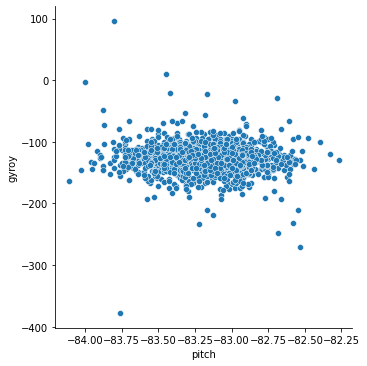

In [8]:
sns.relplot(x = "pitch", y = "gyroy", data = df)

In [9]:
for x in range(len(df)):
    if -150 < df["gyroy"][x] < -100:
        df.loc[x, "up"] = 1
    else:
        df.loc[x, "up"] = 0

In [10]:
df.sample(10)

,gyroy,kalangley,kd,ki,kp,pitch,res,up
90,-124,-83.28,1,5,22,-83.30,200,1.0
1363,-124,-83.18,1,5,22,-82.97,200,1.0
1403,-128,-83.14,1,5,22,-83.04,200,1.0
173,-110,-83.21,1,5,22,-83.42,200,1.0
1404,-124,-83.13,1,5,22,-83.02,200,1.0
788,-155,-83.15,1,5,22,-83.31,200,0.0
492,-184,-83.27,1,5,22,-82.93,200,0.0
410,-120,-83.16,1,5,22,-83.39,200,1.0
1133,-95,-83.19,1,5,22,-82.75,200,0.0
867,-141,-83.11,1,5,22,-82.94,200,1.0


In [11]:
#df.to_csv("teste.csv", index=False)

In [12]:
features = df.iloc[:,0:7]
target = df.iloc[:,7]

In [13]:
target

0       1.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
1570    1.0
1571    1.0
1572    1.0
1573    1.0
1574    1.0
Name: up, Length: 1575, dtype: float64

In [14]:
features

,gyroy,kalangley,kd,ki,kp,pitch,res
0,-145,-83.30,1,5,22,-83.20,200
1,-155,-83.30,1,5,22,-83.14,200
2,-146,-83.31,1,5,22,-83.48,200
3,-110,-83.31,1,5,22,-83.36,200
4,-99,-83.32,1,5,22,-83.54,200
...,...,...,...,...,...,...,...
1570,-113,-83.21,1,5,22,-83.55,200
1571,-143,-83.21,1,5,22,-83.00,200
1572,-110,-83.20,1,5,22,-83.12,200
1573,-142,-83.21,1,5,22,-83.32,200


In [15]:
X_train, X_test, y_train, y_test = train_test_split(target, features, test_size=0.33, random_state=8)

In [16]:
X_train.shape

(1055,)

In [17]:
#import tensorflow as tf

In [18]:
# modelo = Sequential([tf.keras.layers.Input(shape=(7,)),
#                     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
modelo = Sequential()
modelo.add(Dense(12, input_dim=7, activation='relu'))
modelo.add(Dense(12, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [19]:
#modelo.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
historico = modelo.fit(y_train, X_train, epochs=100)

Epoch 1/100
33/33 [==============================] - 0s 761us/step - loss: 17.9650 - accuracy: 0.1905
Epoch 2/100
33/33 [==============================] - 0s 863us/step - loss: 0.7776 - accuracy: 0.7555
Epoch 3/100
33/33 [==============================] - 0s 792us/step - loss: 0.4971 - accuracy: 0.8161
Epoch 4/100
33/33 [==============================] - 0s 772us/step - loss: 0.3782 - accuracy: 0.8313
Epoch 5/100
33/33 [==============================] - 0s 817us/step - loss: 0.3592 - accuracy: 0.8332
Epoch 6/100
33/33 [==============================] - 0s 980us/step - loss: 0.3503 - accuracy: 0.8398
Epoch 7/100
33/33 [==============================] - 0s 879us/step - loss: 0.3411 - accuracy: 0.8474
Epoch 8/100
33/33 [==============================] - 0s 946us/step - loss: 0.3321 - accuracy: 0.8464
Epoch 9/100
33/33 [==============================] - 0s 885us/step - loss: 0.3211 - accuracy: 0.8512
Epoch 10/100
33/33 [==============================] - 0s 1ms/step - loss: 0.3129 - accurac

In [21]:
modelo.test_on_batch(y_train, X_train)
modelo.metrics_names

['loss', 'accuracy']

In [22]:
print(historico.history.keys())

dict_keys(['loss', 'accuracy'])


In [23]:
scores = modelo.evaluate(y_test, X_test)
print("\n")
print("Acuracia do modelo")
print("\n%s: %2f%%" % (modelo.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.0589 - accuracy: 0.9885


Acuracia do modelo

accuracy: 98.846155%


In [24]:
prediction = modelo.predict([[-74, -64, -51, -19, -11, 11, 23]])
print("prediction shape:", prediction)

prediction shape: [[5.4592372e-12]]


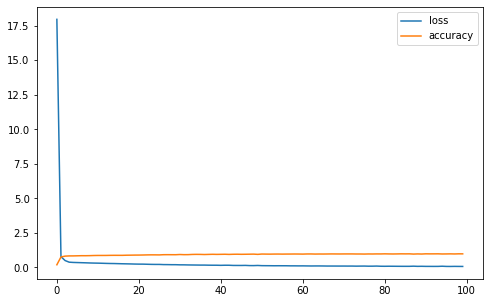

In [25]:
from matplotlib import pyplot as plt
pd.DataFrame(historico.history).plot(figsize=(8,5))
plt.show()

In [26]:
from random import sample
from random import randint

aux = 0
while (1):
  #sorteados = sample(range(-100, 100), 7)
  #print(sorteados)
  #sorteio = sample(range(-100, 100), 1)
  kd = randint(-100, 100)
  ki = randint(-100, 100)
  kp = randint(-100, 100)

  valor = [130, -83.18, kd, ki, kp, -83.3, 200]
  #print(valor)

  prediction = modelo.predict([valor])*100

  if prediction >= 0.8:
    print("tentativa: ", aux)
    print("numeros: ", valor)
    print("prediction shape:", prediction)
  aux += 1

KeyboardInterrupt: 